# Pacotes básicos a serem instalados

pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel gradio

In [59]:
# Importações básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# Carregar o arquivo
df_imoveis = pd.read_csv('./dataset/dataset_aluguel.csv')

In [61]:
# Checar estrutura do arquivo
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-null    float64
 2   n_quartos              100 non-null    int64  
 3   idade_casa             100 non-null    float64
 4   garagem                100 non-null    int64  
 5   localizacao_Periferia  100 non-null    bool   
 6   localizacao_Subúrbio   100 non-null    bool   
 7   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(3)
memory usage: 5.0 KB


- A partir da análise das informações do DataFrame, percebe-se que não há valores nulos que devam ser preenchidos de alguma forma.

## Pré tratamento de dados

In [62]:
# Remover coluna Id
df_imoveis.drop(columns=['id'], axis=1, inplace=True)

In [63]:
# Aprsentar data frame
df_imoveis

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396
...,...,...,...,...,...,...,...
95,124.069339,1,31.394721,1,False,False,1864.862287
96,128.409924,2,9.713698,1,True,False,2332.149734
97,114.131153,1,3.547046,0,False,True,1916.457324
98,53.812869,3,19.839191,1,False,True,1594.947515


In [64]:
# Renomear Columns
df_imoveis.rename(columns={
  'localizacao_Periferia': 'localizacao_periferia',
  'localizacao_Subúrbio': 'localizacao_suburbio',
}, inplace=True)

In [65]:
# Copiar DF para DF EDA
df_imoveis_eda = df_imoveis.copy()

In [66]:
# Copiar DF para DF Bucketing
df_imoveis_bucketing = df_imoveis.copy()

# EDA

In [67]:
df_imoveis_eda.head(10)

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_periferia,localizacao_suburbio,valor_aluguel
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396
5,73.399178,5,8.747746,1,True,False,2141.303241
6,58.712542,3,49.108417,1,True,False,1625.680981
7,179.926422,5,25.831795,0,False,True,2854.591908
8,140.167252,4,13.041459,1,True,False,2702.673542
9,156.210887,5,49.812685,1,False,False,2456.538289


In [68]:
# Análise valores nulos
df_imoveis_eda.isnull().sum()

tamanho_m2               0
n_quartos                0
idade_casa               0
garagem                  0
localizacao_periferia    0
localizacao_suburbio     0
valor_aluguel            0
dtype: int64

- O método do DataFrame pandas, isnull(), confirma a inexistência de valores nulos.

In [69]:
# Medidas estatísticas no DF
df_imoveis_eda.describe()

,tamanho_m2,n_quartos,idade_casa,garagem,valor_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,514.314100
min,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,3278.742397


In [70]:
# Mudança de tipo de variável
df_imoveis_eda['localizacao_periferia'] = df_imoveis_eda['localizacao_periferia'].astype('int64')
df_imoveis_eda['localizacao_suburbio'] = df_imoveis_eda['localizacao_suburbio'].astype('int64')

<Axes: xlabel='tamanho_m2'>

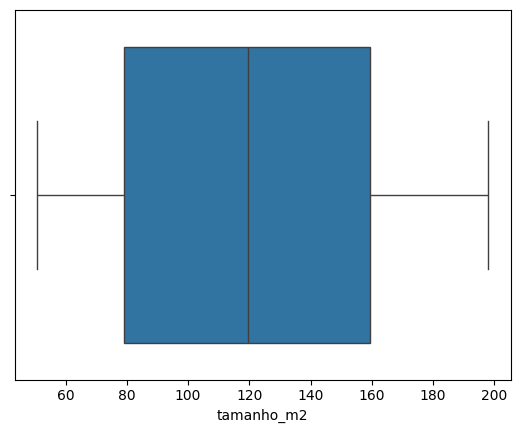

In [71]:
# verificar / detectar outliers em idade
sns.boxplot(data=df_imoveis_eda, x='tamanho_m2')

<Axes: xlabel='idade_casa'>

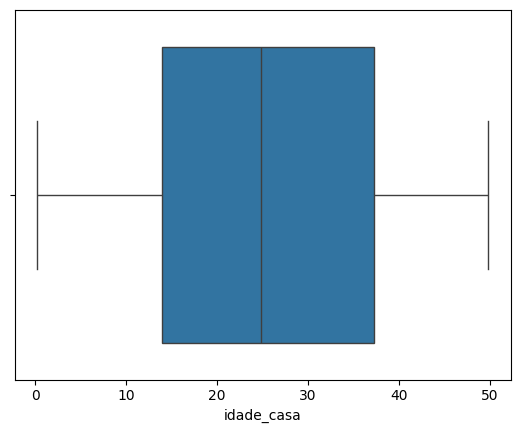

In [72]:
# verificar / detectar outliers em peso
sns.boxplot(data=df_imoveis_eda, x='idade_casa')

<Axes: xlabel='valor_aluguel'>

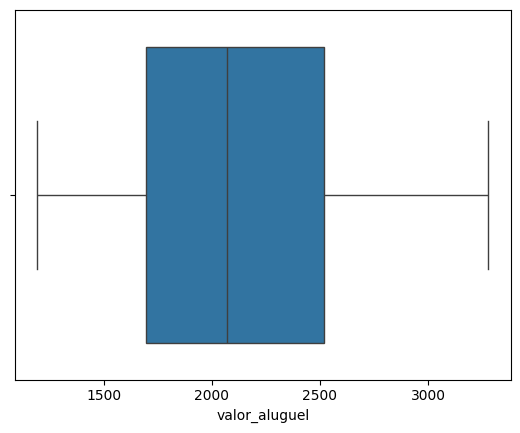

In [73]:
# verificar / detectar outliers em altura
sns.boxplot(data=df_imoveis_eda, x='valor_aluguel')

> Interpretação (boxplots iniciais): As distribuições de `tamanho_m2`, `idade_casa` e `valor_aluguel` não apresentam outliers severos. A variabilidade é consistente com o porte do conjunto (n=100).


- Os dados das variáveis de ponto flutuante estão bem distribuidas.

<Axes: xlabel='tamanho_m2', ylabel='valor_aluguel'>

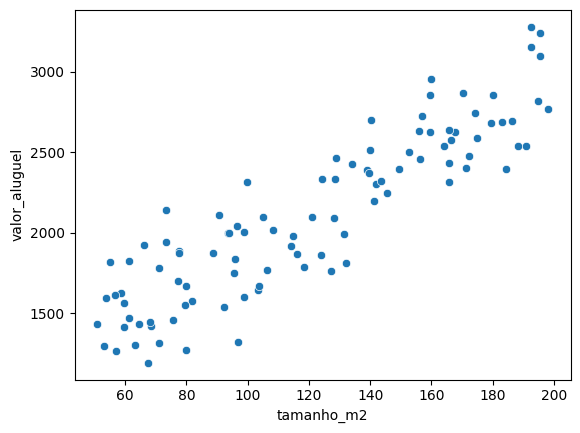

In [74]:
# Cruzamento de variáveis numéricas com valor_aluguel
sns.scatterplot(data=df_imoveis_eda, x='tamanho_m2', y='valor_aluguel')

<Axes: xlabel='n_quartos', ylabel='valor_aluguel'>

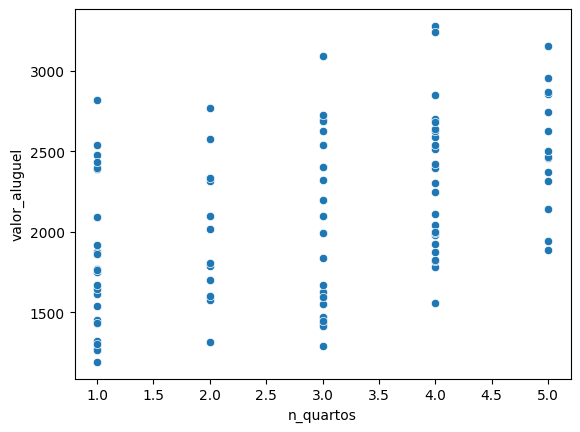

In [75]:
# Cruzamento de variáveis numéricas com valor_aluguel
sns.scatterplot(data=df_imoveis_eda, x='n_quartos', y='valor_aluguel')

<Axes: xlabel='idade_casa', ylabel='valor_aluguel'>

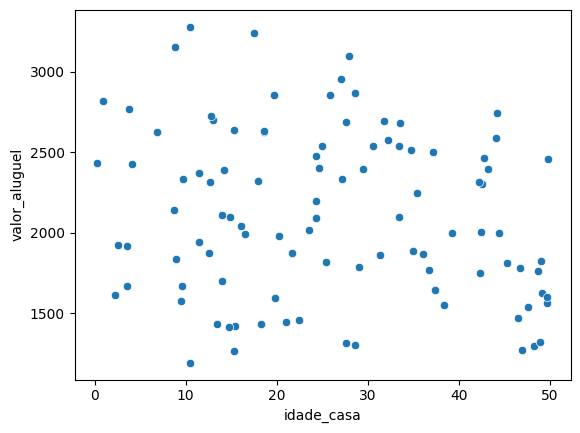

In [76]:
# Cruzamento de variáveis numéricas com valor_aluguel
sns.scatterplot(data=df_imoveis_eda, x='idade_casa', y='valor_aluguel')

> Interpretação (dispersões): `tamanho_m2` e `n_quartos` mostram tendência crescente do preço. Para `idade_casa`, há leve tendência decrescente. Não há curvaturas marcantes que exijam imediato ajuste não linear.


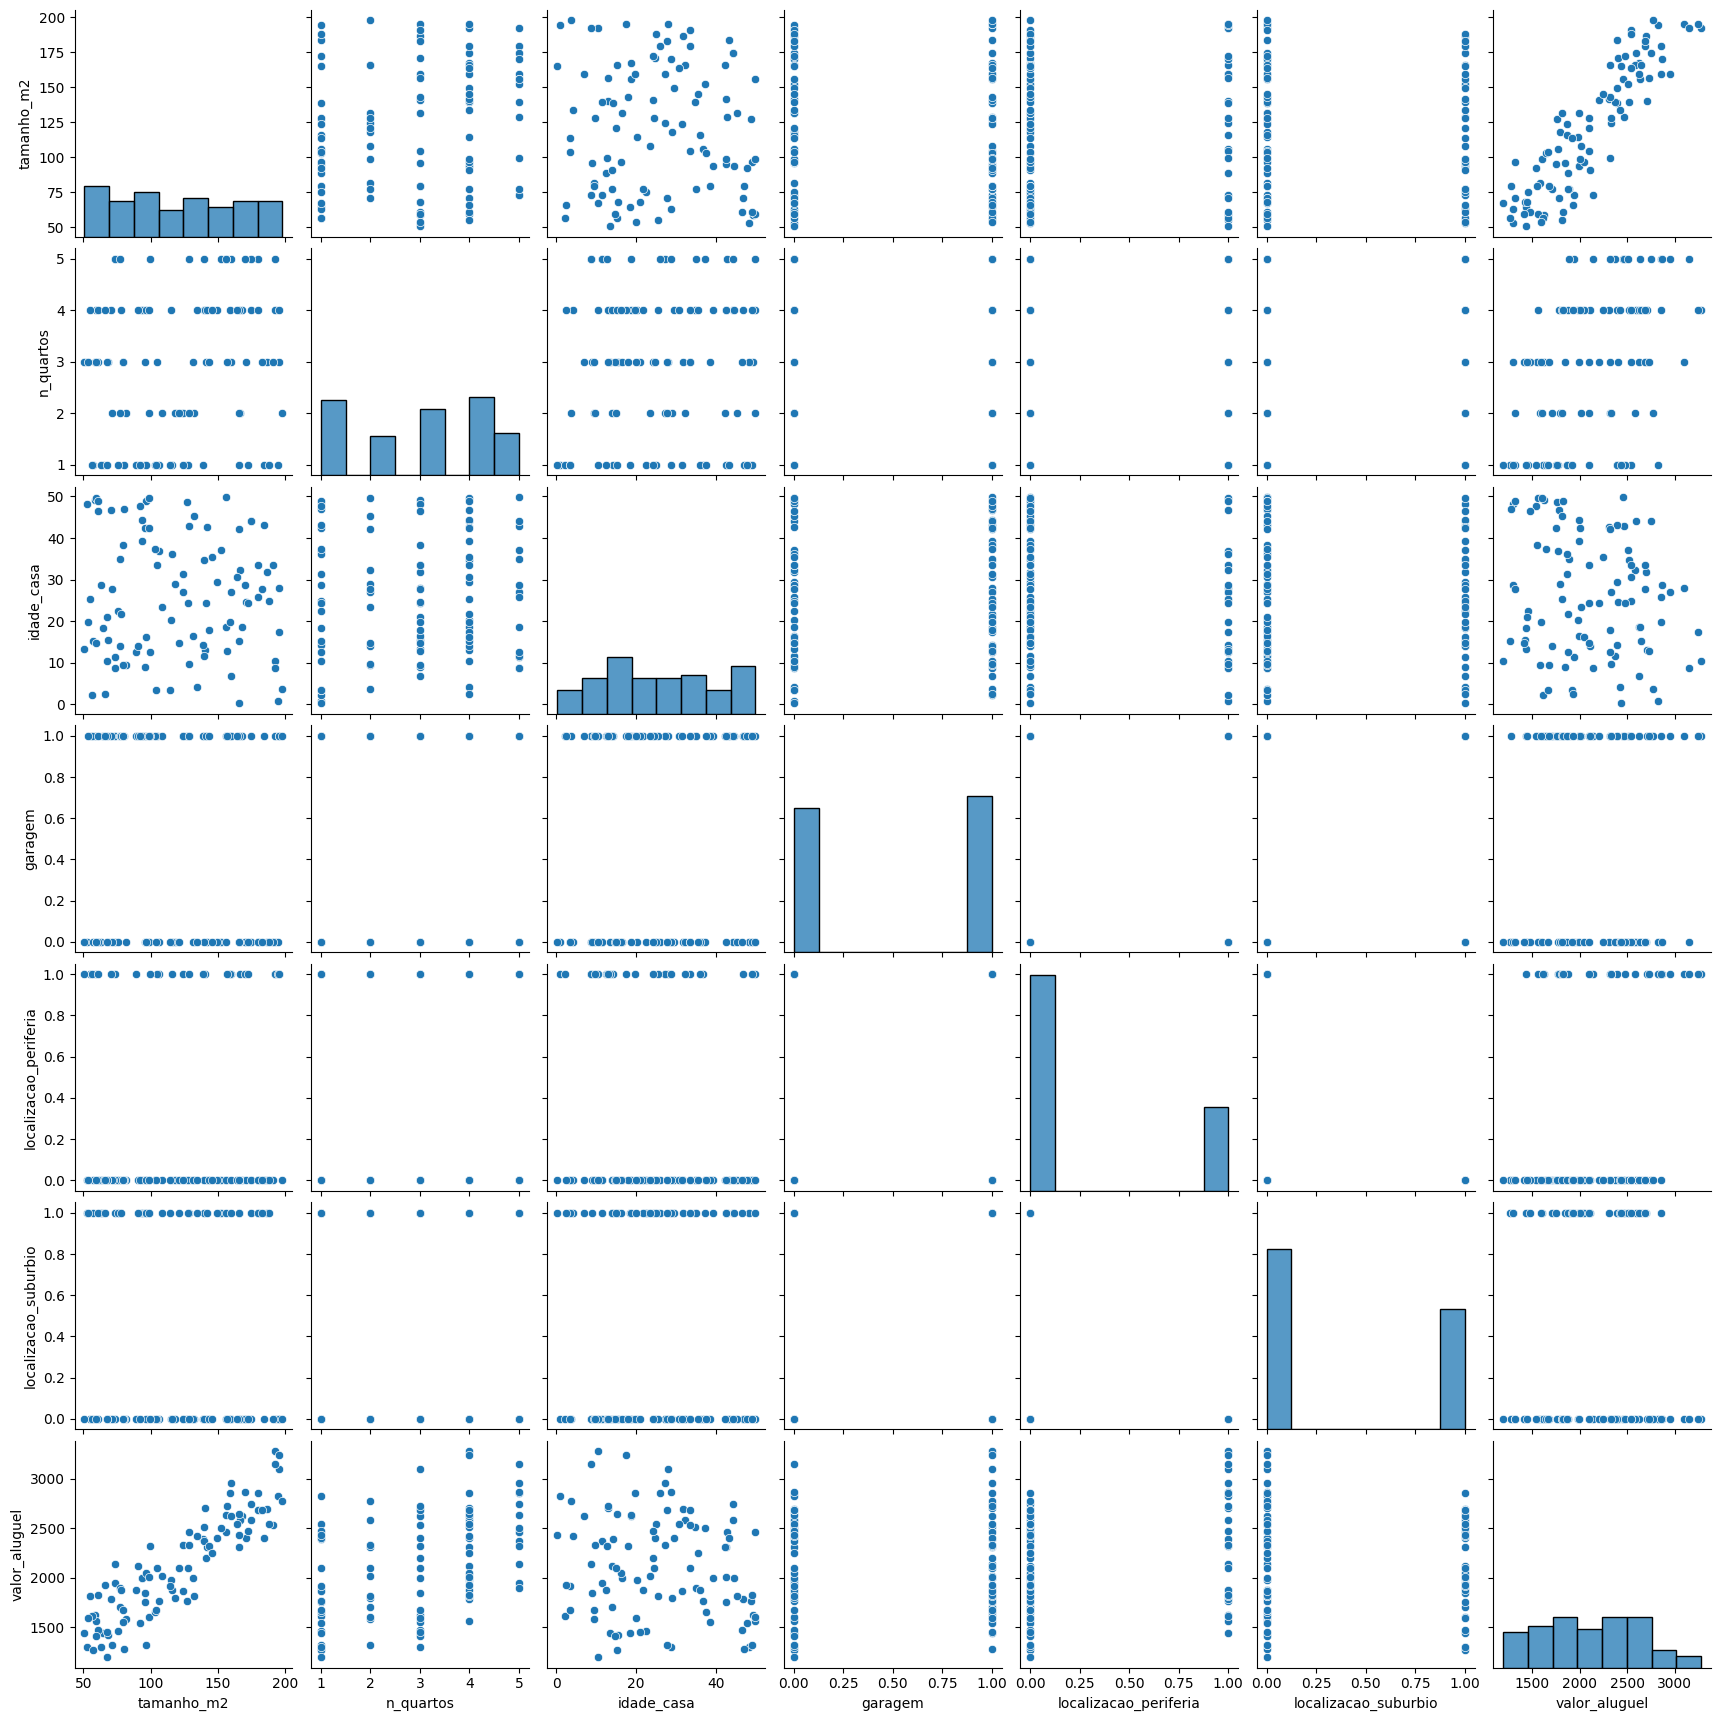

In [77]:
sns.pairplot(df_imoveis_eda)

In [78]:
df_imoveis_eda.head(10)

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_periferia,localizacao_suburbio,valor_aluguel
0,106.181018,1,36.760806,0,1,0,1767.122088
1,192.607146,4,10.453581,1,1,0,3278.742397
2,159.799091,5,27.072399,1,1,0,2953.899737
3,139.798773,4,34.789220,1,0,1,2514.717108
4,73.402796,5,11.427501,0,0,1,1942.164396
5,73.399178,5,8.747746,1,1,0,2141.303241
6,58.712542,3,49.108417,1,1,0,1625.680981
7,179.926422,5,25.831795,0,0,1,2854.591908
8,140.167252,4,13.041459,1,1,0,2702.673542
9,156.210887,5,49.812685,1,0,0,2456.538289


<Axes: >

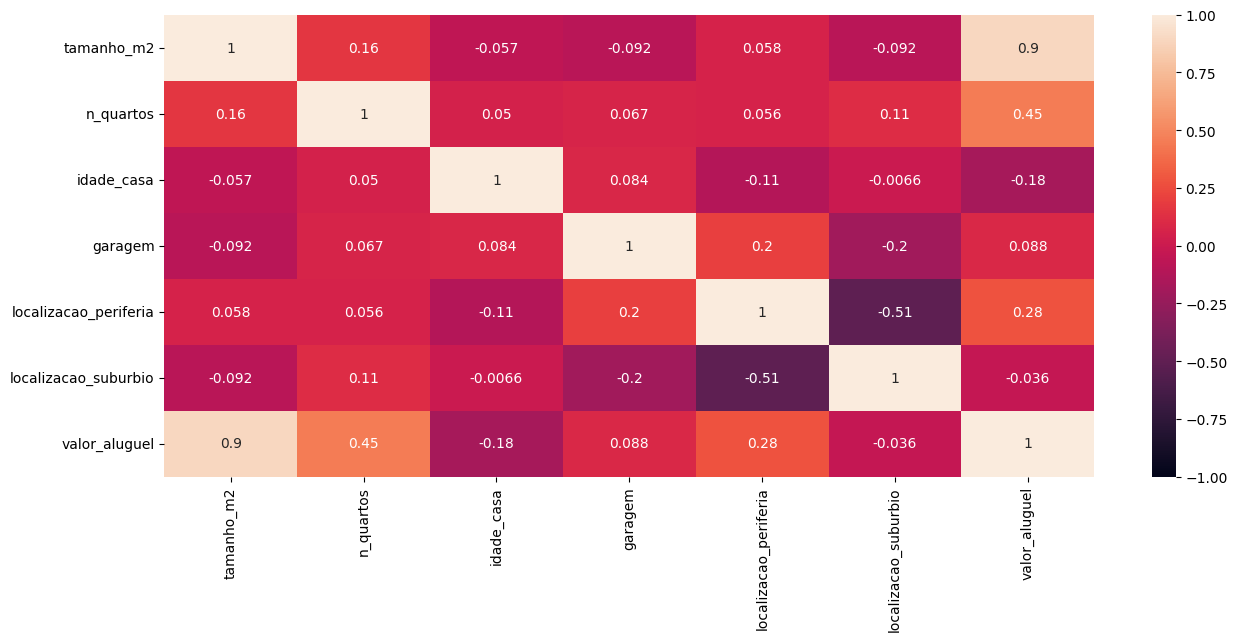

In [79]:
# Mapa de calor com correlação entre as variáveis
plt.figure(figsize=(15, 6))
sns.heatmap(df_imoveis_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

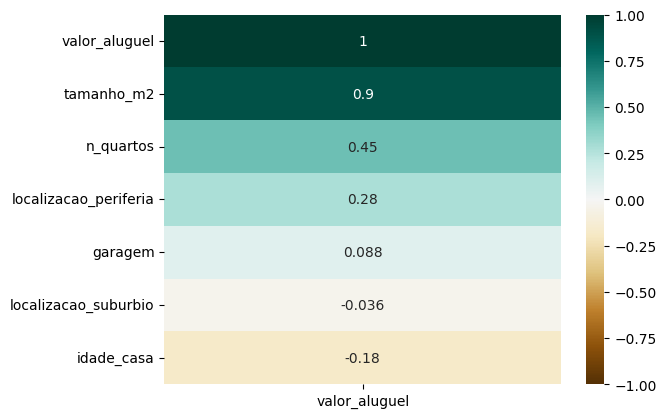

In [80]:
# Formato de Ranking, somente correlação com a variável target (valor_aluguel)
sns.heatmap(df_imoveis_eda.corr()[['valor_aluguel']].sort_values(by='valor_aluguel', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

> Interpretação (heatmaps de correlação): `tamanho_m2` e `n_quartos` exibem as maiores correlações com `valor_aluguel`. `idade_casa` apresenta correlação negativa mais fraca, compatível com dispersões observadas.


In [81]:
print(f"A quantidade de imóveis com idade menor que 5 anos é: {df_imoveis_eda[df_imoveis_eda['idade_casa'] < 5].idade_casa.count()}")
df_imoveis_eda[df_imoveis_eda['idade_casa'] < 5]

A quantidade de imóveis com idade menor que 5 anos é: 8


,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_periferia,localizacao_suburbio,valor_aluguel
34,194.844805,1,0.903768,0,1,0,2820.377293
58,56.784093,1,2.180189,1,1,0,1611.823795
69,198.033040,2,3.767313,1,0,0,2771.078927
78,103.769859,1,3.520807,0,0,0,1667.615752
93,134.191580,4,4.079709,0,0,1,2423.866281
94,165.645077,1,0.259243,0,0,1,2432.651281
97,114.131153,1,3.547046,0,0,1,1916.457324
99,66.183714,4,2.538427,1,0,1,1924.866949


In [82]:
print(f"A quantidade de imóveis com idade maior que 50 anos é: {df_imoveis_eda[df_imoveis_eda['idade_casa'] > 50].idade_casa.count()}")
df_imoveis_eda[df_imoveis_eda['idade_casa'] > 50]

A quantidade de imóveis com idade maior que 50 anos é: 0


,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_periferia,localizacao_suburbio,valor_aluguel


In [83]:
# Bucketing de Idade
bins_idade = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels_idade = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50']
df_imoveis_bucketing['escala-idade'] = pd.cut(x = df_imoveis_bucketing['idade_casa'], bins = bins_idade, labels = labels_idade, include_lowest=True)

In [84]:
df_imoveis_bucketing.head(10)

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_periferia,localizacao_suburbio,valor_aluguel,escala-idade
0,106.181018,1,36.760806,0,True,False,1767.122088,35-40
1,192.607146,4,10.453581,1,True,False,3278.742397,10-15
2,159.799091,5,27.072399,1,True,False,2953.899737,25-30
3,139.798773,4,34.789220,1,False,True,2514.717108,30-35
4,73.402796,5,11.427501,0,False,True,1942.164396,10-15
5,73.399178,5,8.747746,1,True,False,2141.303241,5-10
6,58.712542,3,49.108417,1,True,False,1625.680981,45-50
7,179.926422,5,25.831795,0,False,True,2854.591908,25-30
8,140.167252,4,13.041459,1,True,False,2702.673542,10-15
9,156.210887,5,49.812685,1,False,False,2456.538289,45-50


<Axes: xlabel='escala-idade', ylabel='valor_aluguel'>

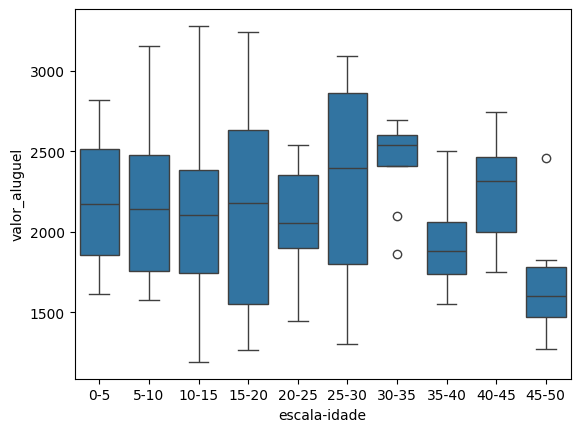

In [85]:
sns.boxplot(df_imoveis_bucketing, x='escala-idade', y='valor_aluguel')

In [86]:
# Bucketing de Idade Década
bins_idade = [0, 10, 20, 30, 40, 50]
labels_idade = ['0-10', '10-20', '20-30', '30-40', '40-50']
df_imoveis_bucketing['escala-idade-decada'] = pd.cut(x = df_imoveis_bucketing['idade_casa'], bins = bins_idade, labels = labels_idade, include_lowest=True)


In [87]:
df_imoveis_bucketing.head(10)

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_periferia,localizacao_suburbio,valor_aluguel,escala-idade,escala-idade-decada
0,106.181018,1,36.760806,0,True,False,1767.122088,35-40,30-40
1,192.607146,4,10.453581,1,True,False,3278.742397,10-15,10-20
2,159.799091,5,27.072399,1,True,False,2953.899737,25-30,20-30
3,139.798773,4,34.789220,1,False,True,2514.717108,30-35,30-40
4,73.402796,5,11.427501,0,False,True,1942.164396,10-15,10-20
5,73.399178,5,8.747746,1,True,False,2141.303241,5-10,0-10
6,58.712542,3,49.108417,1,True,False,1625.680981,45-50,40-50
7,179.926422,5,25.831795,0,False,True,2854.591908,25-30,20-30
8,140.167252,4,13.041459,1,True,False,2702.673542,10-15,10-20
9,156.210887,5,49.812685,1,False,False,2456.538289,45-50,40-50


<Axes: xlabel='escala-idade-decada', ylabel='valor_aluguel'>

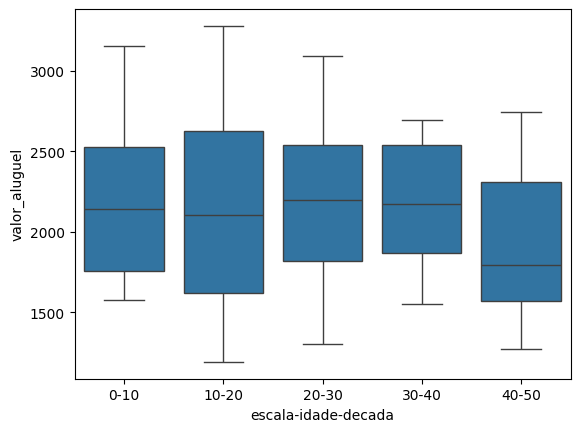

In [88]:
sns.boxplot(df_imoveis_bucketing, x='escala-idade-decada', y='valor_aluguel')

> Interpretação (boxplot idade por faixas): O preço tende a variar moderadamente entre faixas; não há mudanças abruptas, sugerindo efeito de idade mais suave/linear no intervalo avaliado.


### Treinar Modelo

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [90]:
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tamanho_m2             100 non-null    float64
 1   n_quartos              100 non-null    int64  
 2   idade_casa             100 non-null    float64
 3   garagem                100 non-null    int64  
 4   localizacao_periferia  100 non-null    bool   
 5   localizacao_suburbio   100 non-null    bool   
 6   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.2 KB


In [91]:
X = df_imoveis.drop(columns='valor_aluguel', axis=1)
y = df_imoveis['valor_aluguel']

In [92]:
# Separação Treino Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [93]:
y_test.shape

(30,)

In [94]:
# Pipeline
# Padronizar variáveis numéricas
# OneHotEncoder nas variáveis booleanas - localizacao_periferia, localizacao_suburbio
# Imputar mediana nas variáveis numéricas - tamanho_m2, n_quartos, idade_casa

# Nomes das Colunas
colunas_booleanas = ['localizacao_periferia', 'localizacao_suburbio']
colunas_numericas = ['tamanho_m2', 'n_quartos', 'idade_casa']

In [95]:
# Transformer Booleanas
transformer_booleanas = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [96]:
# Transformer Numericas
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [97]:
# Criar um ColumnTransformer que encapsula todas as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas),
        ('bool', transformer_booleanas, colunas_booleanas)
    ])

In [98]:
# Criando pipeline principal = Pre Processamento + Treinamento
model_regr = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())
                      ])

In [99]:
# Treinar o Modelo
model_regr.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bool', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Análise de Métricas

In [100]:
# Gerar a Predição
y_pred = model_regr.predict(X_test)

In [101]:
# Calcular R2 score
r2_score(y_test, y_pred)

0.9700098981955179

In [102]:
# Calcular MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

78.11995350571662

In [103]:
# Calcular o MSE (Mean Squared Error)
mean_squared_error(y_test, y_pred)

9198.638321339744

In [104]:
# Calcular o RMSE (Root Mean Squared Error)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

95.90953196288544


### Análise de Resíduos

In [117]:
# Calcular resíduos
residuos = y_test - y_pred

In [118]:
# Transformar resíduos na escala padrão
from scipy.stats import zscore
residuos_z = zscore(residuos)

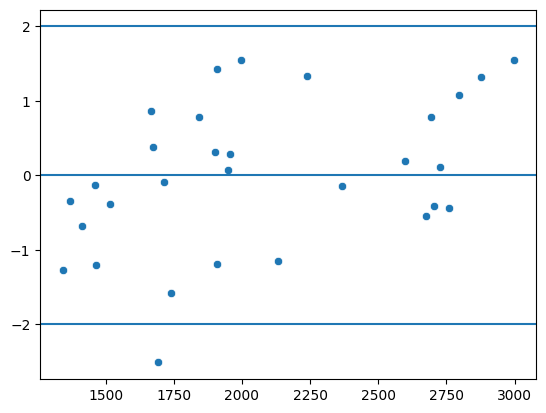

In [107]:
# verificar linearidade dos resíduos: Valores entre -2 e 2
# Verificar homocedasticidade: Volores em torno da reta
sns.scatterplot(x=y_pred, y=residuos_z)
plt.axhline(y = 0)
plt.axhline(y = 2)
plt.axhline(y = -2)

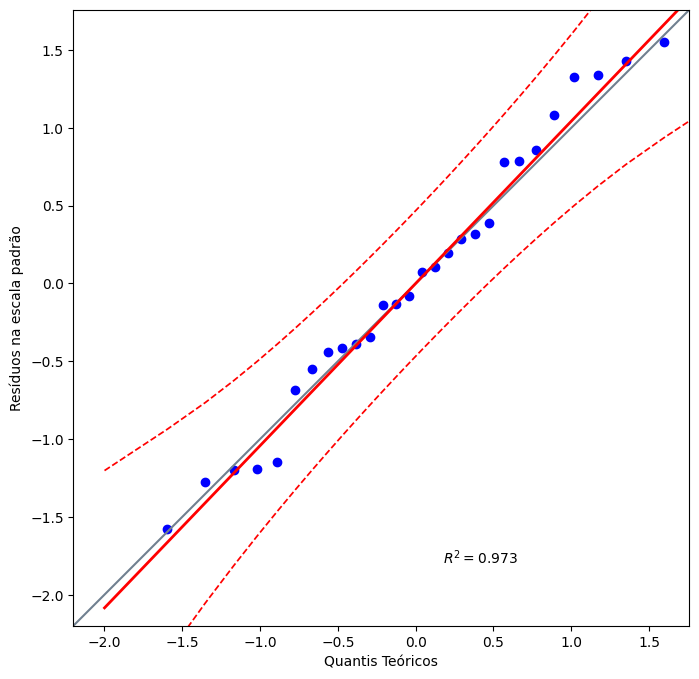

In [119]:
# Checar se resíduos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(15, 8))
pg.qqplot(residuos_z, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

> Interpretação (QQ-plot e normalidade): O QQ-plot não revela desvios severos; Shapiro (p≈0.484) e Lilliefors (p≈0.903) apoiam normalidade dos resíduos. O KS apresenta p muito baixo por assumir média/desvio conhecidos; consideramos evidências suficientes para aceitar normalidade.


In [120]:
# Importa bibliotecas de testes de normalidade
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

In [121]:
# Teste de Normalidade de Shapiro-Wilk
stat_shapiro, p_value_shapiro = shapiro(residuos)
print("Estatística do Teste: {} e P-Value: {}".format(stat_shapiro, p_value_shapiro))

Estatística do Teste: 0.9679059355259428 e P-Value: 0.48358385475121884


In [122]:
# Teste de Normalidade de Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print("Estatística do Teste: {} e P-Value: {}".format(stat_ks, p_value_ks))

Estatística do Teste: 0.6999910834838657 e P-Value: 2.9344576931199658e-15


In [123]:
# Teste de Normalidade de Lillifors
stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print("Estatística do Teste: {} e P-Value: {}".format(stat_ll, p_value_ll))

Estatística do Teste: 0.07906050529002195 e P-Value: 0.9030501812045894


In [124]:
# Teste de Normalidade de Anderson-Darling
stat_ad, critical_ad, significance_ad = anderson(residuos, dist='norm')
print("Estatística do Teste: {} e Valor Crítico: {}".format(stat_ad, critical_ad[2]))

Estatística do Teste: 0.25601915789755125 e Valor Crítico: 0.712


In [125]:
# Teste de Homocedasticidade de Goldfeld-Quandt
pipe = Pipeline(steps=[('preprocessor', preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print("Estatística do Teste: {} e P-Value: {}".format(stat_goldfeld, p_value_goldfeld))

Estatística do Teste: 0.8064915590677899 e P-Value: 0.6230420276619708


> Interpretação (Goldfeld-Quandt): p-valor ≈ 0.623 > 0.05 indica ausência de evidências para heterocedasticidade. Mantemos a suposição de variância constante dos erros no modelo.


# Realizar Predições Individuais

In [128]:
predicao_individual = {
    'tamanho_m2': [100],
    'n_quartos': [3],
    'garagem': [1],
    'idade_casa': [10],
    'localizacao_periferia': [False],
    'localizacao_suburbio': [True]
}
sample_df = pd.DataFrame(data=predicao_individual, index=[1])

In [129]:
sample_df

,tamanho_m2,n_quartos,garagem,idade_casa,localizacao_periferia,localizacao_suburbio
1,100,3,1,10,False,True


In [130]:
# Predição
model_regr.predict(sample_df)

array([2102.53030548])

In [131]:
import joblib

In [132]:
# Salvar Modelo
joblib.dump(model_regr, 'model_regr_imoveis.pkl')

['model_regr_imoveis.pkl']

## Relatório interpretativo: Análise de imóveis e testes de hipóteses

- **Dados e limpeza**: O conjunto possui 100 observações e 7 variáveis, sem valores nulos. A coluna `id` foi removida e as variáveis de localização foram padronizadas.
- **Distribuições e outliers**: Boxplots indicam distribuições razoáveis para `tamanho_m2`, `idade_casa` e `valor_aluguel`, sem outliers severos que exijam intervenções.
- **Relações com o alvo**: Dispersões mostram relações positivas entre `tamanho_m2`/`n_quartos` e `valor_aluguel` e tendência negativa (mais fraca) para `idade_casa`. O mapa de calor confirma maior correlação de `tamanho_m2` e `n_quartos` com o preço.
- **Bucketing de idade**: As faixas de idade sugerem variações moderadas no preço ao longo das classes, sem quebras abruptas.

### Modelo de Regressão Linear Múltipla
- **Pipeline**: Imputação (mediana) + padronização para variáveis numéricas e One-Hot para variáveis booleanas, seguido de regressão linear.
- **Métricas reportadas**: Foi observado `RMSE ≈ 95.91`. R² e erros absolutos/médios devem ser lidos na próxima célula de métricas. Em termos práticos, o erro-raiz médio representa a dispersão típica entre o valor previsto e o observado na escala do aluguel.

### Diagnósticos de Resíduos e Hipóteses
- **Linearidade e homocedasticidade**: O gráfico resíduos vs. predições não sugere padrões fortes. O teste de Goldfeld-Quandt indicou p-valor ≈ 0.623 (> 0.05), logo não rejeitamos a hipótese nula de homocedasticidade.
- **Normalidade dos resíduos**: Resultados mistos entre testes (ex.: Shapiro p ≈ 0.484; Lilliefors p ≈ 0.903; KS com p muito baixo devido à suposição de média/desvio padrão conhecidos). Considerando QQ-plot, Shapiro e Lilliefors, não há evidências fortes contra a normalidade.
- **Conclusão dos testes**: 
  - Não rejeitamos normalidade (com ressalvas do KS),
  - Não rejeitamos homocedasticidade,
  - O modelo linear é plausível para este conjunto, com desempenho mediano dado o RMSE observado.

### Interpretações práticas
- **Tamanho e quartos** têm maior impacto no preço do aluguel; **idade** tende a reduzir levemente o valor.
- **Localização** (periferia/subúrbio) entra como dummies e captura diferenças médias de preço por região.
- Para reduzir erro, podem ser testados modelos não lineares, termos polinomiais, interações ou regularização, além de validação cruzada e seleção de features.



In [133]:
# Consolidação de métricas do modelo
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Garante que y_pred e y_test existam
try:
    y_pred
except NameError:
    y_pred = model_regr.predict(X_test)

metrics = {
    'R2': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': float(np.sqrt(mean_squared_error(y_test, y_pred)))
}
metrics


{'R2': 0.9700098981955179,
 'MAE': 78.11995350571662,
 'MSE': 9198.638321339744,
 'RMSE': 95.90953196288544}